In [93]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [53]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 20

In [54]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [55]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
(32,)


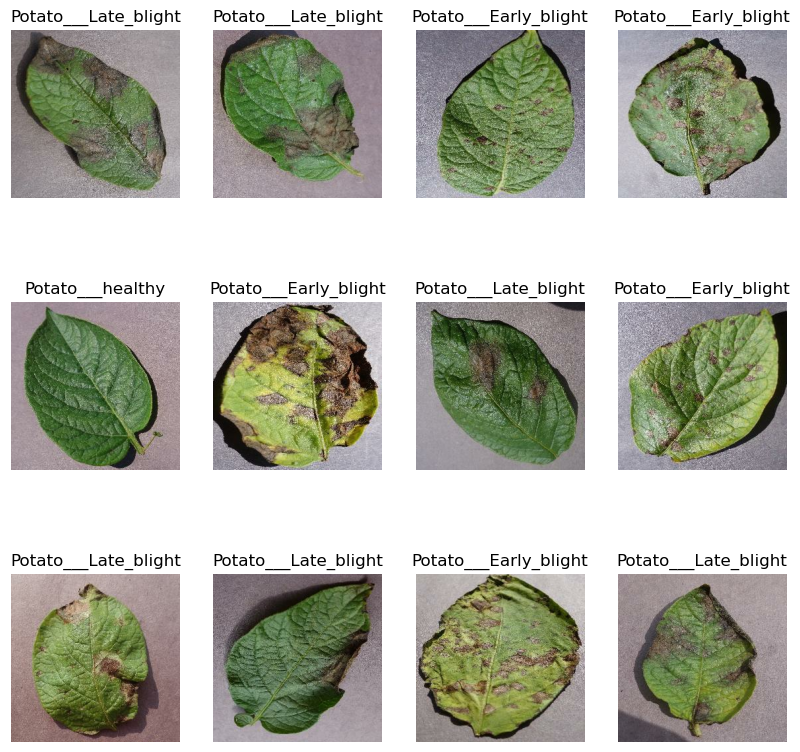

In [56]:
plt.figure(figsize = (10,10))
for img_batch, labels_batch in dataset.take(1):
    print(img_batch.shape)
    print(labels_batch.numpy().shape)
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [57]:
# 80% training data
# 10% validation data
# 10% testing data

In [58]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [59]:
train_ds = dataset.take(54)
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [60]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [61]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [62]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [83]:
# get training, testing, validation data, by splitting data
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    assert(train_split+ test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [84]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [85]:
len(train_ds)

54

In [86]:
len(val_ds)

6

In [87]:
len(test_ds)

8

In [88]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [89]:
for image, labels in train_ds.take(1):
    print(image[0].numpy()/255)

[[[0.5568628  0.5137255  0.5372549 ]
  [0.59607846 0.5529412  0.5764706 ]
  [0.627451   0.58431375 0.60784316]
  ...
  [0.5254902  0.46666667 0.4862745 ]
  [0.5568628  0.49803922 0.5176471 ]
  [0.5411765  0.48235294 0.5019608 ]]

 [[0.5882353  0.54509807 0.5686275 ]
  [0.6117647  0.5686275  0.5921569 ]
  [0.627451   0.58431375 0.60784316]
  ...
  [0.54509807 0.4862745  0.5058824 ]
  [0.5568628  0.49803922 0.5176471 ]
  [0.5137255  0.45490196 0.4745098 ]]

 [[0.60784316 0.5647059  0.5882353 ]
  [0.61960787 0.5764706  0.6       ]
  [0.6156863  0.57254905 0.59607846]
  ...
  [0.5058824  0.44705883 0.46666667]
  [0.49019608 0.43137255 0.4509804 ]
  [0.48235294 0.42352942 0.44313726]]

 ...

 [[0.6745098  0.6313726  0.62352943]
  [0.6862745  0.6431373  0.63529414]
  [0.6901961  0.64705884 0.6392157 ]
  ...
  [0.49803922 0.44313726 0.44313726]
  [0.6431373  0.5882353  0.5882353 ]
  [0.9490196  0.89411765 0.89411765]]

 [[0.69411767 0.6509804  0.6431373 ]
  [0.7176471  0.6745098  0.6666667 ]


In [70]:
resize_and_rescale = tf.keras.Sequential(
    [layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)]
)

In [71]:
data_augmentation = tf.keras.Sequential(
    [layers.RandomFlip("horizantal_vertical"),
     layers.RandomRotation(0.2)]
)

In [72]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    
])

model.build(input_shape = input_shape)


In [73]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# define architecture
# compile model (to check and improve accuracy )

In [75]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [76]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5088 - loss: 0.9308 - val_accuracy: 0.5885 - val_loss: 0.8501
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7352 - loss: 0.6137 - val_accuracy: 0.8594 - val_loss: 0.3703
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8567 - loss: 0.3692 - val_accuracy: 0.9010 - val_loss: 0.2510
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8937 - loss: 0.2418 - val_accuracy: 0.9323 - val_loss: 0.2020
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9014 - loss: 0.2492 - val_accuracy: 0.8854 - val_loss: 0.2898
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9061 - loss: 0.2294 - val_accuracy: 0.9479 - val_loss: 0.1780
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9390 - loss: 0.1586 - val_accuracy: 0.9323 - val_loss: 0.1647
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9493 - loss: 0.1517 - val_accuracy: 0.9635 - val_loss

In [77]:
scores = model.evaluate(test_ds)
scores

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - accuracy: 0.9796 - loss: 0.0380


[0.038111165165901184, 0.98046875]

In [80]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

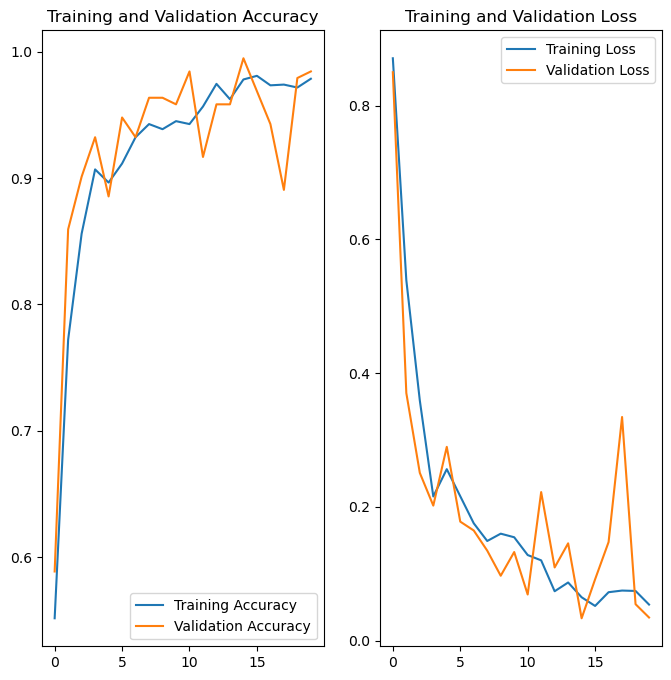

In [90]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image for prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Actual label:  Potato___Late_blight
Predicted Label: Potato___Late_blight


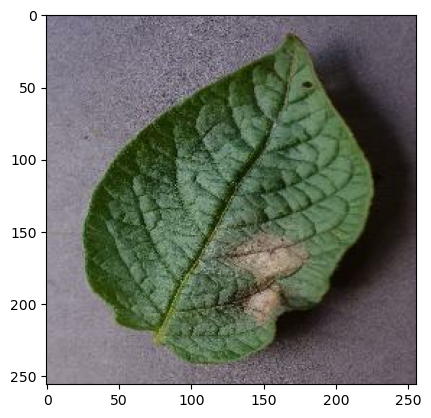

In [100]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    print("First Image for prediction")
    plt.imshow(first_image)
    batch_predict = model.predict(images_batch)
    print("Actual label: ", class_names[labels_batch[0].numpy()])
    print("Predicted Label:", class_names[np.argmax(batch_predict[0])])

In [116]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


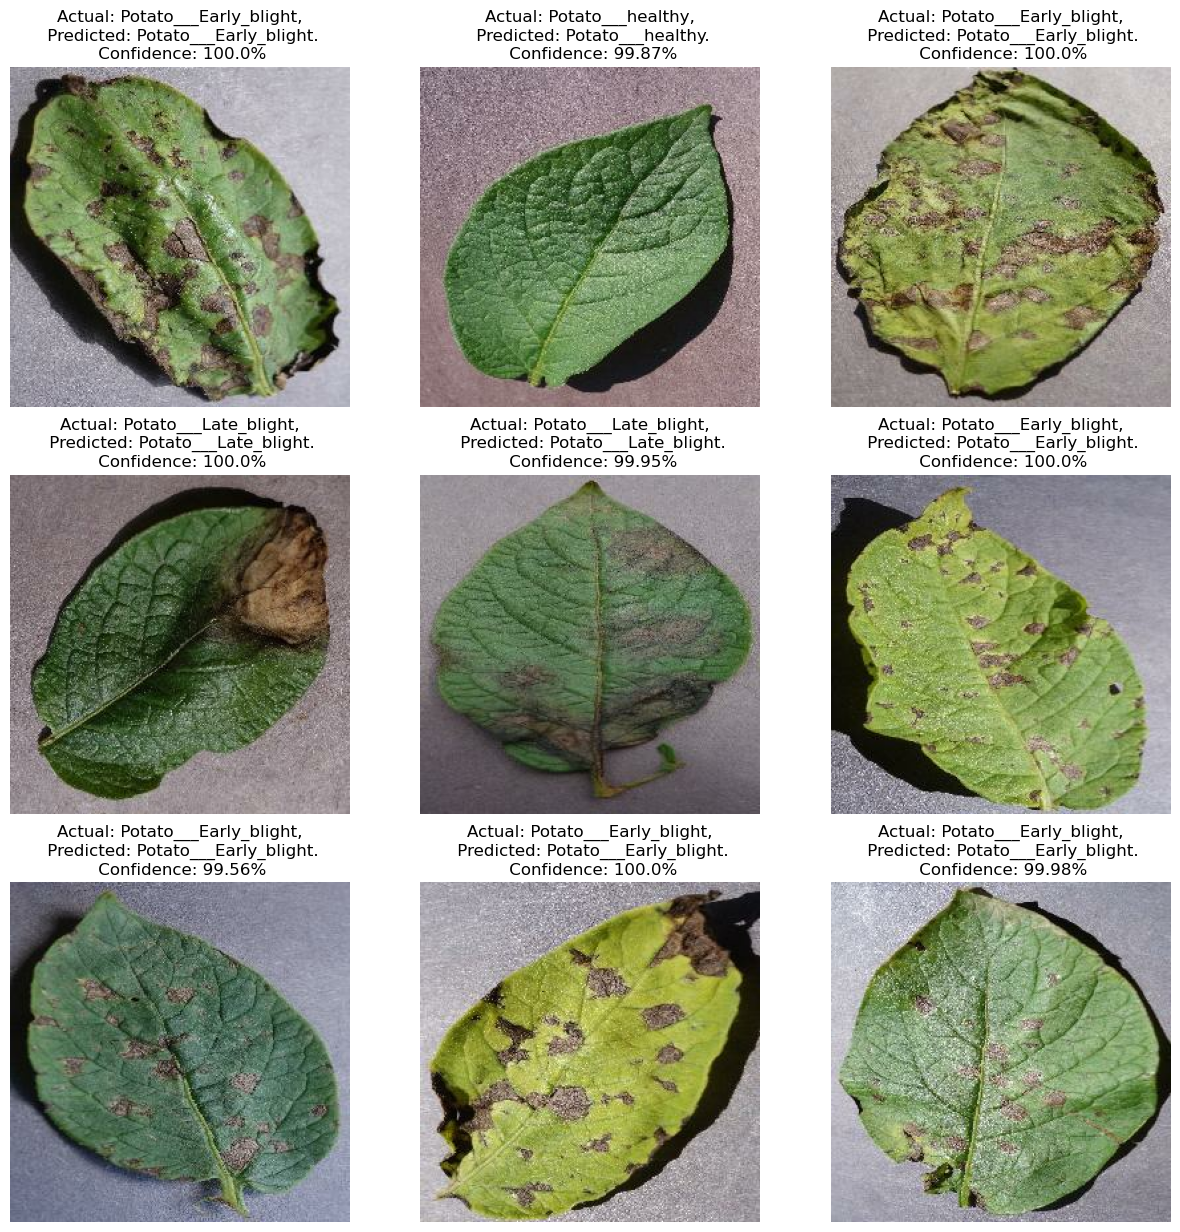

In [118]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        image_val = images[i].numpy().astype("uint8")
        plt.imshow(image_val)
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [132]:
import os
model_version = 1
model.save(f"../models/{model_version}")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=../models/1.

In [139]:
import os

model_directory = "../models"
next_version = 1
files = os.listdir(model_directory)

model_versions = []
for f in files:
    if f.startswith('model_'):
        try:
            version = int(f.split('_')[1].split('.')[0])
            model_versions.append(version)
        except ValueError:
            continue
if model_versions:
    next_version = max(model_versions) + 1
model.save(f"{model_directory}/model_{next_version}.keras")

print(f"Model saved as model_{next_version}.keras")


Model saved as model_1.keras
